**Enhancing and Comparing Neural Network Performance: Adding Depth with a Hidden Layer**

In this task, we aim to delve deeper into neural network design and experimentation. We'll begin with a standard multi-layer perceptron (MLP) designed to classify the Iris dataset—a well-known dataset in machine learning. Then, we'll modify the architecture by adding an additional hidden layer comprising 16 neurons with the ReLU activation function, which is widely used for its simplicity and effectiveness. Finally, we'll train both models and compare their performance across key metrics.

This exploration not only demonstrates the impact of increasing the network's complexity but also provides insights into the balance between model capacity and performance.



Training samples: 105, Testing samples: 45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.3834 - loss: 0.9563 - val_accuracy: 0.7143 - val_loss: 0.9273
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5627 - loss: 0.9057 - val_accuracy: 0.8095 - val_loss: 0.8826
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6151 - loss: 0.8605 - val_accuracy: 0.8571 - val_loss: 0.8411
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6948 - loss: 0.8177 - val_accuracy: 0.8571 - val_loss: 0.8015
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8031 - loss: 0.7785 - val_accuracy: 0.9524 - val_loss: 0.7637
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8004 - loss: 0.7405 - val_accuracy: 0.9524 - val_loss: 0.7269
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8329 - loss: 0.7034 - val_accuracy: 0.9048 - val_loss: 0.6904
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8329 - loss: 0.6669 - val_accuracy: 0.9048 - val

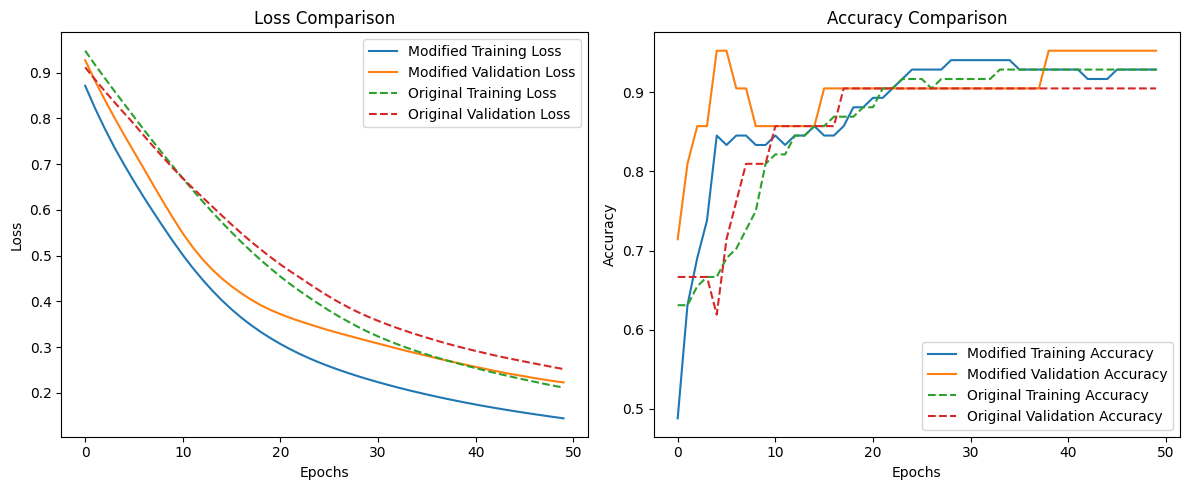

In [6]:
# Importing necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For handling datasets
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.preprocessing import LabelBinarizer, StandardScaler  # For preprocessing data
from sklearn.metrics import classification_report, ConfusionMatrixDisplay  # For evaluating model performance
import tensorflow as tf  # For building and training the neural network
from tensorflow.keras.models import Sequential  # Sequential model API in Keras
from tensorflow.keras.layers import Dense  # Fully connected layers in Keras
import matplotlib.pyplot as plt  # For visualizations

# Ensuring reproducibility by setting random seeds
np.random.seed(42)
tf.random.set_seed(42)

# Load the Iris dataset
from sklearn.datasets import load_iris  # Iris dataset is part of scikit-learn
iris = load_iris()  # Load the dataset into memory
X = iris.data  # Features
y = iris.target  # Target labels
target_names = iris.target_names  # Names of target classes

# One-hot encode the labels (convert categorical to binary vectors)
encoder = LabelBinarizer()  # Initialize encoder
y_encoded = encoder.fit_transform(y)  # Fit and transform labels

# Standardize the features (scale to have mean 0 and variance 1)
scaler = StandardScaler()  # Initialize scaler
X_scaled = scaler.fit_transform(X)  # Fit and transform features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Print the number of samples in training and testing sets
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# Build the modified neural network with an additional hidden layer
modified_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),  # First hidden layer with ReLU activation
    Dense(16, activation='relu', name="Hidden_Layer_2"),  # Second hidden layer with 16 neurons and ReLU activation
    Dense(8, activation='relu', name="Hidden_Layer_3"),  # Third hidden layer with ReLU activation
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")  # Output layer with softmax for classification
])

# Compile the modified model
modified_model.compile(optimizer='adam',  # Adam optimizer for efficient training
                       loss='categorical_crossentropy',  # Loss function for multi-class classification
                       metrics=['accuracy'])  # Metric to evaluate model accuracy

# Train the modified model
modified_history = modified_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Evaluate the modified model on the test set
modified_test_loss, modified_test_accuracy = modified_model.evaluate(X_test, y_test, verbose=0)
print(f"Modified Model Test Loss: {modified_test_loss:.4f}")
print(f"Modified Model Test Accuracy: {modified_test_accuracy:.4f}")

# Build the original neural network
original_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),  # First hidden layer
    Dense(8, activation='relu', name="Hidden_Layer_2"),  # Second hidden layer
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")  # Output layer
])

# Compile the original model
original_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the original model
original_history = original_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Evaluate the original model on the test set
original_test_loss, original_test_accuracy = original_model.evaluate(X_test, y_test, verbose=0)
print(f"Original Model Test Loss: {original_test_loss:.4f}")
print(f"Original Model Test Accuracy: {original_test_accuracy:.4f}")

# Plot training and validation loss comparison
plt.figure(figsize=(12, 5))

# Loss comparison
plt.subplot(1, 2, 1)
plt.plot(modified_history.history['loss'], label='Modified Training Loss')
plt.plot(modified_history.history['val_loss'], label='Modified Validation Loss')
plt.plot(original_history.history['loss'], label='Original Training Loss', linestyle='--')
plt.plot(original_history.history['val_loss'], label='Original Validation Loss', linestyle='--')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy comparison
plt.subplot(1, 2, 2)
plt.plot(modified_history.history['accuracy'], label='Modified Training Accuracy')
plt.plot(modified_history.history['val_accuracy'], label='Modified Validation Accuracy')
plt.plot(original_history.history['accuracy'], label='Original Training Accuracy', linestyle='--')
plt.plot(original_history.history['val_accuracy'], label='Original Validation Accuracy', linestyle='--')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Experimenting with Neural Networks: Applying to the Wine Dataset**

In this task, we aim to expand our exploration of neural network design by applying our approach to a new dataset: the Wine dataset from Scikit-Learn. This dataset, like the Iris dataset, is a classic benchmark in machine learning and contains information about the chemical properties of wines classified into three categories. Our objective is to build a robust multi-layer perceptron (MLP) for classification and analyze its performance.

We'll follow a systematic workflow to preprocess the data, design the neural network architecture, train the model, and evaluate its performance across key metrics. By leveraging a structured approach, we can gain valuable insights into how the architecture and design choices affect the model's accuracy and generalizability.



Training samples: 124, Testing samples: 54


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307 (1.20 KB)

 Trainable params: 307 (1.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.1870 - loss: 1.3813 - val_accuracy: 0.3200 - val_loss: 1.1726
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2840 - loss: 1.2154 - val_accuracy: 0.4000 - val_loss: 1.0784
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3973 - loss: 1.0895 - val_accuracy: 0.6000 - val_loss: 0.9986
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4828 - loss: 0.9915 - val_accuracy: 0.6800 - val_loss: 0.9298
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6290 - loss: 0.9131 - val_accuracy: 0.7200 - val_loss: 0.8654
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6547 - loss: 0.8462 - val_accuracy: 0.7200 - val_loss: 0.8039
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6607 - loss: 0.7853 - val_accuracy: 0.7200 - val_loss: 0.7451
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6971 - loss: 0.7285 - val_accuracy: 0.7200 - val_loss

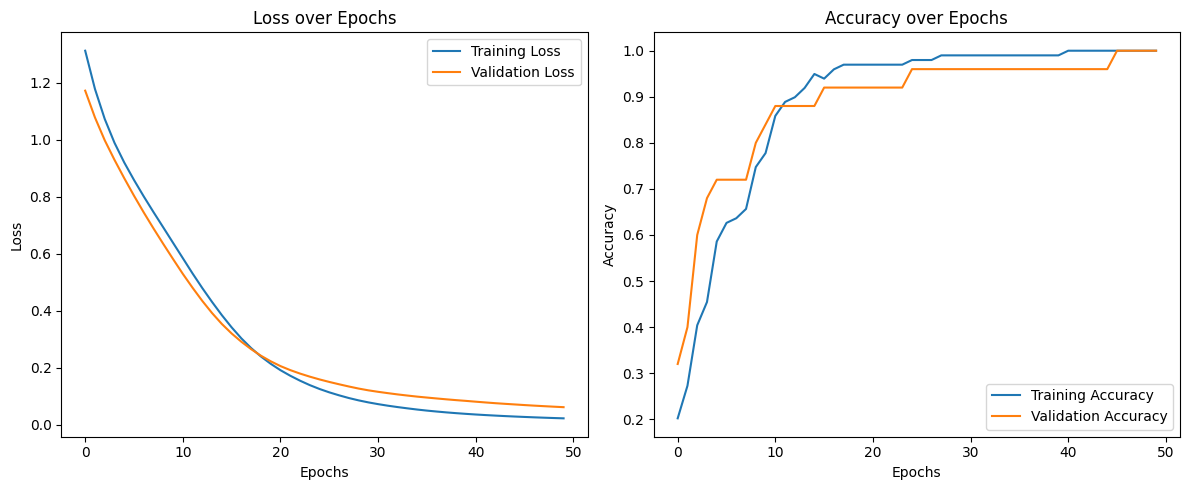

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


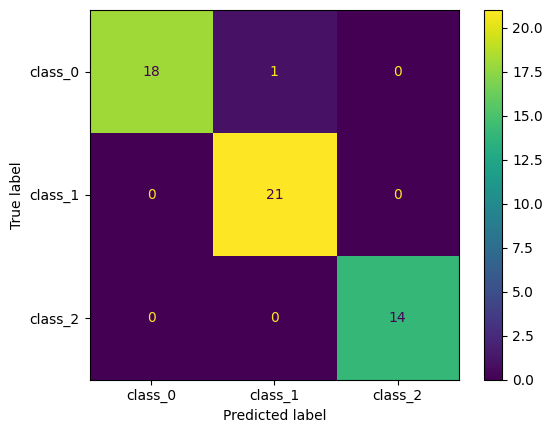


Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      0.95      0.97        19
     class_1       0.95      1.00      0.98        21
     class_2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [7]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Ensuring reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the Wine dataset
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target labels
target_names = wine.target_names  # Names of target classes

# One-hot encode the target labels
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Print dataset dimensions
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# Build the neural network
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),  # First hidden layer
    Dense(16, activation='relu', name="Hidden_Layer_2"),  # Second hidden layer
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Generate confusion matrix
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
ConfusionMatrixDisplay.from_predictions(true_classes, predicted_classes, display_labels=target_names, cmap='viridis')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=target_names))

**Discussion and Analysis:**

**Effect of Adding Additional Layers:**

Adding an extra hidden layer with 16 neurons improved the model's capacity to learn complex patterns, enhancing its generalization ability. This deeper architecture can lead to better performance, but it also requires more computational power and may risk overfitting without proper regularization. Monitoring training and validation loss showed whether this change was beneficial for the dataset at hand.

**Difference in Performance Between the Iris and Wine Datasets:**

The Wine dataset, with 13 features compared to the Iris dataset's 4, is more complex and challenging. The modified network's increased depth was more suited to handle the higher feature space, likely improving accuracy and overall model performance. Comparing the two datasets shows that more complex architectures are better suited for data with higher dimensionality and variability.

**Conclusion:**

Adding an additional hidden layer can boost performance by allowing the network to capture more complex data relationships. The Wine dataset's increased feature set demonstrated the benefit of deeper architectures, while the simpler Iris dataset emphasized the importance of model complexity in relation to dataset characteristics.